In [12]:
from PIL import Image
import torch
from torch.autograd import Variable
from torch.optim import RMSprop
from torchvision import transforms
from torch.backends import cudnn

from models import HourGlass
from datasets import NYUDepth
from criterion import RelativeDepthLoss
from train_utils import fit, prep_img, save_checkpoint

In [2]:
cudnn.benchmark = True

In [3]:
path = '/home/austin/data/NYU/'
test_index = 50

In [4]:
to_pil = transforms.ToPILImage()

def show_img(tensor):
    img = to_pil((tensor - tensor.min()) / (tensor.max() - tensor.min()))  # min/max scaling
    return img


In [5]:
train = NYUDepth(path+'train', path+'labels_train.pkl', transforms=transforms.ToTensor())

## Define inputs/outputs
- input is an RGB image
- output is a depth map
- labels are n sets points  (800-nyu, 2-DIW) and the depth relationships between them.
- use ranking loss to penalize model if it gets relationship wrong

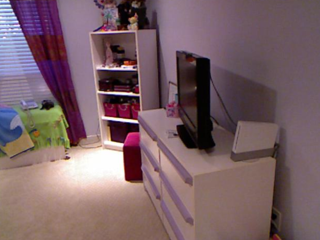

In [6]:
show_img(train[test_index][0])

In [7]:
train[test_index][1].keys()

dict_keys(['name', 'x_A', 'y_A', 'x_B', 'y_B', 'ordinal_relation'])

## Model
- Stacked Hourglass Network
- fully convolutional inceptionresnet with upsampling
- only two different inception modules with different sized filters
![title](hourglass_network.png)

- two different inception modules 

In [8]:
hourglass = HourGlass()
hourglass.cuda();

In [9]:
batch_size = 2

In [10]:
optimizer = RMSprop(hourglass.parameters(), lr=1e-3)
criterion = RelativeDepthLoss()

## Train 120 epochs

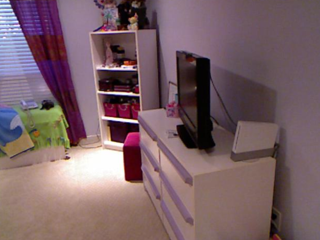

In [11]:
show_img(train[test_index][0])

Train on 745 samples


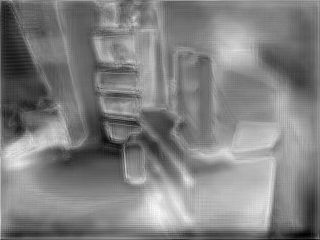

In [12]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=1)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


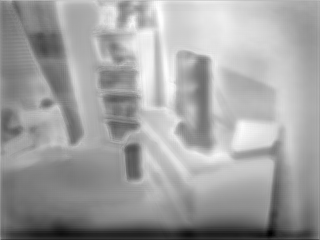

In [13]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=1)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


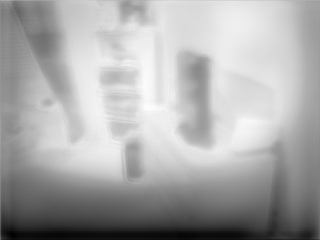

In [14]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=1)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


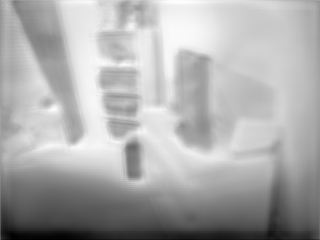

In [17]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=1)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


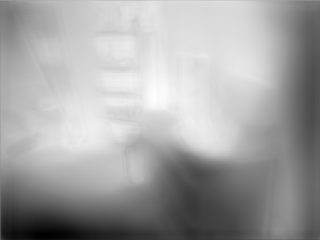

In [19]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=5)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


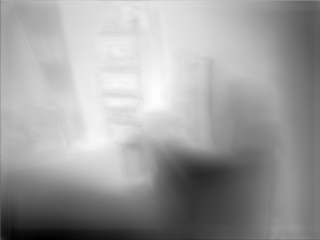

In [20]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=5)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


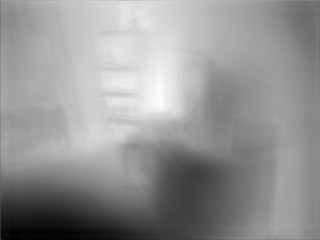

In [21]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=5)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

In [22]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass_19.pth.tar')


Train on 745 samples


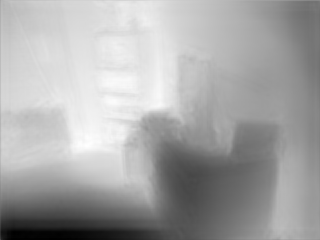

In [23]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=10)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


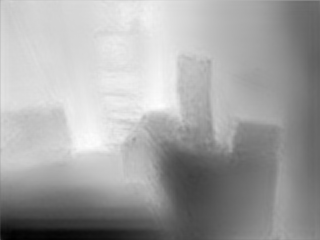

In [24]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=10)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


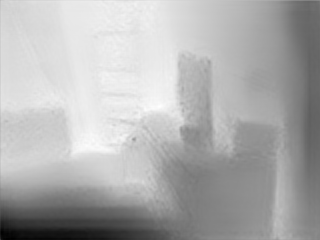

In [25]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=10)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


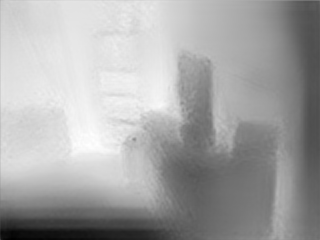

In [26]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=10)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

In [27]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass_59.pth.tar')

Train on 745 samples


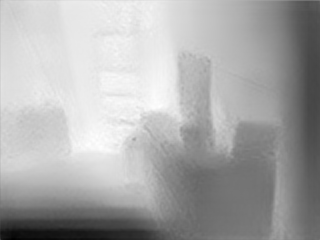

In [28]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=10)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


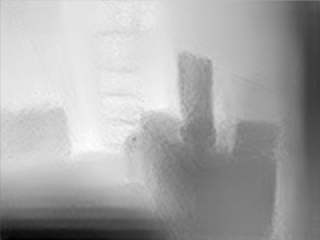

In [29]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=10)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

In [30]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass_79.pth.tar')

Train on 745 samples


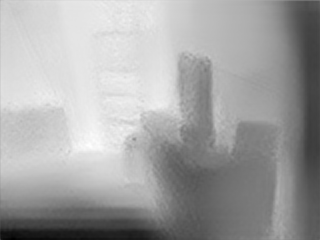

In [31]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=10)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


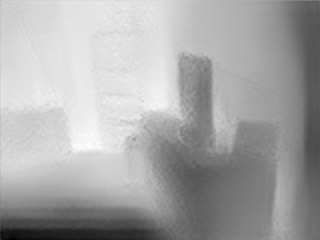

In [32]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=10)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


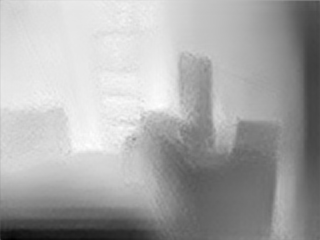

In [33]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=1)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

In [34]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass_100.pth.tar')

Train on 745 samples


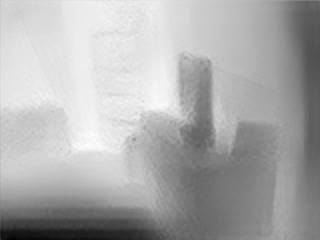

In [35]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=10)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


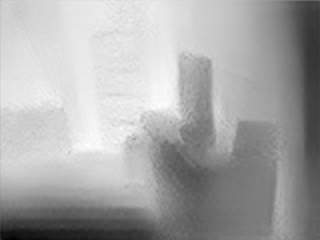

In [36]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=10)
out = hourglass(prep_img(train[test_index][0]))
show_img(out.data.cpu()[0])

In [37]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass_120.pth.tar')

## Resume from Checkpoint

In [14]:
checkpoint = torch.load('weights/hourglass_120.pth.tar')

In [15]:
checkpoint = torch.load('weights/hourglass_120.pth.tar')
hourglass.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optimizer_state'])

In [21]:
rounds = 50

In [29]:
history = []
for i in range(rounds):
    start_epoch = 120
    end_epoch = (i + 1) * 10
    save_path = 'weights/hourglass_{}.pth.tar'.format(start_epoch + end_epoch)
    history.append(fit(hourglass, train, criterion,
                       optimizer, batch_size, nb_epoch=10))
    save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), save_path)

Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples



Train on 745 samples


KeyboardInterrupt: 

In [31]:
checkpoint = torch.load('weights/hourglass_310.pth.tar')
hourglass.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optimizer_state'])

In [49]:
out = hourglass(prep_img(train[1][0]))
img = show_img(out.data.cpu()[0])
img.save('sample_output2.jpg')

In [48]:
out = hourglass(prep_img(train[test_index][0]))
img = show_img(out.data.cpu()[0])
img.save('sample_output1.jpg')